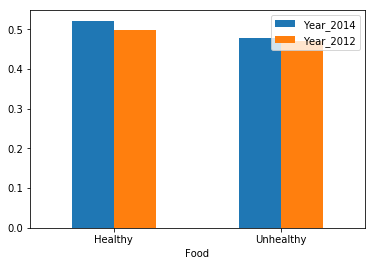

In [49]:
import pandas as pd

data = pd.read_csv('book1.csv')

food_data = data[['Food','Count_14','Total_14','Count_12','Total_12']]
food_data.rename({'Count_14':'Year_2014','Count_12':'Year_2012'},axis=1,inplace=True)

food_data = food_data.loc[food_data.Food.notnull()]

food_data

unhealthy = ['Beverage w/ additions','Cereal w/ additions','Bread/baked products w/ additions','Frozen meals','Ice cream/frozen yogurt w/ additions','Dried beans and vegetable w/ additions','LunchablesÂ®','Chips w/ additions']
healthy = ['Salad','Sandwiches','Soup','Fruit w/ additions','Tortilla products','Meat, poultry, fish','Other mixtures']

for unhealthy_value in unhealthy:
    food_data.Food = food_data.Food.str.replace(unhealthy_value,'Unhealthy')

for healthy_value in healthy:
    food_data.Food = food_data.Food.str.replace(healthy_value,'Healthy')

food_data1 = food_data.groupby(['Food']).agg({'Year_2014':'sum','Total_14':'max','Year_2012':'sum','Total_12':'max'})

food_data1.Year_2014 = (food_data1.Year_2014/food_data1.Total_14)
food_data1.Year_2012 = (food_data1.Year_2012/food_data1.Total_14)

food_data1 = food_data1[['Year_2014','Year_2012']]

food_data1.plot.bar(rot=0)